In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing dataset

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = "/content/drive/MyDrive/Colab Notebooks"
files = [
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv"
]

dfs = []

for file in files:
    file_path_full = os.path.join(file_path, file)
    df = pd.read_csv(file_path_full)
    selected_df = df.sample(n = 31437, random_state = 1)
    dfs.append(selected_df)

# Save each selected DataFrame to a new CSV file
for i, selected_df in enumerate(dfs):
    new_file_path = os.path.join(file_path, f"selected_{files[i]}")
    selected_df.to_csv(new_file_path, index=False)

print("Processed all datasets and saved the selected rows to new files.")


Processed all datasets and saved the selected rows to new files.


### Concatenating files

In [ ]:
merged_data = pd.concat(dfs, ignore_index = True)

In [ ]:
merged_data.shape

(251496, 79)

### Removing whitespace from dataset.

In [ ]:
merged_data.columns = merged_data.columns.str.strip()

### Replaces all instances of the specified character

In [ ]:
for col in merged_data.columns:
    if(merged_data[col].dtype == "object"):
        merged_data[col] = merged_data[col].str.replace('�', '')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251496 entries, 0 to 251495
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             251496 non-null  int64  
 1   Flow Duration                251496 non-null  int64  
 2   Total Fwd Packets            251496 non-null  int64  
 3   Total Backward Packets       251496 non-null  int64  
 4   Total Length of Fwd Packets  251496 non-null  int64  
 5   Total Length of Bwd Packets  251496 non-null  int64  
 6   Fwd Packet Length Max        251496 non-null  int64  
 7   Fwd Packet Length Min        251496 non-null  int64  
 8   Fwd Packet Length Mean       251496 non-null  float64
 9   Fwd Packet Length Std        251496 non-null  float64
 10  Bwd Packet Length Max        251496 non-null  int64  
 11  Bwd Packet Length Min        251496 non-null  int64  
 12  Bwd Packet Length Mean       251496 non-null  float64
 13 

#### Replace infinite values with NaN

In [ ]:
# Replace infinite values with NaN
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
merged_data.isna().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


### Check for missing values

In [ ]:
merged_data.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


### Dropping NaN values

In [ ]:
merged_data = merged_data.dropna(how='any')

In [ ]:
# dropping the target/label
X = merged_data.drop('Label', axis = 1)
y = merged_data['Label']
X.shape, y.shape

((251277, 78), (251277,))

### Descriptive Statistics

In [ ]:

X.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,251277.000000,2.512770e+05,251277.000000,251277.000000,2.512770e+05,2.512770e+05,251277.000000,251277.000000,251277.000000,251277.000000,...,251277.000000,2.512770e+05,2.512770e+05,2.512770e+05,2.512770e+05,2.512770e+05,2.512770e+05,2.512770e+05,2.512770e+05,2.512770e+05
mean,8133.449966,1.289382e+07,9.597556,10.851228,5.465844e+02,1.688547e+04,210.522973,19.695969,60.693135,70.321485,...,5.492958,-2.444593e+03,8.247084e+04,3.920186e+04,1.528082e+05,6.074519e+04,6.329914e+06,5.891758e+05,6.761482e+06,5.874430e+06
std,18191.686543,3.162017e+07,758.726533,1030.102309,6.402296e+03,2.246447e+06,799.814732,67.276846,207.697886,319.977916,...,622.172089,1.084004e+06,6.265803e+05,3.583012e+05,9.721608e+05,5.648661e+05,1.974382e+07,5.029228e+06,2.078839e+07,1.933546e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.510000e+02,1.000000,1.000000,6.000000e+00,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.116000e+04,2.000000,2.000000,5.700000e+01,1.170000e+02,35.000000,6.000000,32.000000,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,1.833664e+06,4.000000,4.000000,1.320000e+02,3.980000e+02,56.000000,36.000000,48.000000,16.263456,...,2.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65534.000000,1.200000e+08,206687.000000,281741.000000,1.645814e+06,6.070000e+08,23360.000000,1983.000000,5238.769231,5796.500690,...,198058.000000,6.000000e+01,7.240000e+07,6.370000e+07,9.020000e+07,7.240000e+07,1.200000e+08,7.509929e+07,1.200000e+08,1.200000e+08


In [ ]:
X.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64

### Count of Attacks

In [ ]:
merged_data.Label.value_counts()

,count
Label,
BENIGN,202974
DDoS,17849
PortScan,17495
DoS Hulk,10335
FTP-Patator,555
DoS GoldenEye,448
SSH-Patator,395
Bot,331
DoS slowloris,277


In [ ]:
merged_data.Label.count().sum()

251277

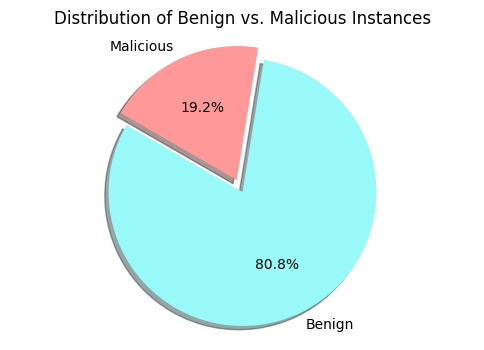

In [2]:
import matplotlib.pyplot as plt

# Assuming you have counts of benign and malicious instances
benign_count =  202974
malicious_count = 48303

labels = ['Benign', 'Malicious']
sizes = [benign_count, malicious_count]
colors = ['#99f9f9', '#ff9999']  # Green for benign, red for malicious
explode = (0.1, 0)  # Explode the first slice (Benign) to highlight it

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('Distribution of Benign vs. Malicious Instances')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
import numpy as np
merged_data[np.isinf(X)] = np.nan

In [ ]:
merged_data.isnull().sum().sum()

0

### Scaling of features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Transform array to dataframe
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
X_scaled1 = X_scaled.dropna(how = 'any')

In [ ]:
X_scaled1.isna().sum().sum()

0

### Finding features with high variance

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

 # create dataframe to store vif values
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(X_scaled1.values,i) for i in range(X_scaled1.shape[1])]
vif['features'] = X_scaled1.columns

vif.sort_values('vif_factor',axis=0,inplace=True, ascending=False)

features_to_remove = vif.loc[vif['vif_factor'] > 10,'features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


['Subflow Bwd Packets', 'Avg Bwd Segment Size', 'Fwd URG Flags', 'Fwd Header Length', 'SYN Flag Count', 'RST Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Bwd Packet Length Mean', 'Avg Fwd Segment Size', 'Fwd Header Length.1', 'Fwd Packet Length Mean', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Total Length of Fwd Packets', 'Total Backward Packets', 'Total Fwd Packets', 'Fwd PSH Flags', 'min_seg_size_forward', 'Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Bwd Header Length', 'Idle Mean', 'Idle Min', 'Idle Max', 'Flow Duration', 'Flow IAT Max', 'Fwd IAT Total', 'Packet Length Mean', 'Fwd IAT Min', 'Flow IAT Std', 'Fwd IAT Max', 'Fwd IAT Mean', 'Average Packet Size', 'Fwd IAT Std', 'Bwd IAT Min', 'Packet Length Std', 'Flow IAT Mean', 'Bwd IAT Mean', 'Flow Packets/s', 'Bwd Packet Length Max', 'Max Packet Length', 'Fwd Packets/s', 'Flow IAT Min', 'Bwd Packet Length Std', 'Bwd IAT Total', 'Idle Std', 'Bwd IAT Max', 'Bwd IAT Std', 'Active Min', 'Active Mean', 'Fwd Packet Length 

### Dropping Features with high variance

In [ ]:
X_scaled2 = X_scaled1.drop(features_to_remove, axis = 1)
X_scaled2.head()

,Destination Port,Fwd Packet Length Min,Bwd Packet Length Min,Flow Bytes/s,Bwd PSH Flags,Bwd URG Flags,Bwd Packets/s,Min Packet Length,FIN Flag Count,PSH Flag Count,...,URG Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward
0,-0.444185,0.539623,1.781975,-0.056334,0.0,0.0,-0.194603,1.581588,-0.156764,-0.688287,...,-0.328784,0.383733,0.0,0.0,0.0,0.0,0.0,0.0,-0.493767,-0.227504
1,-0.444185,0.182887,1.272934,-0.007977,0.0,0.0,0.005733,0.615601,-0.156764,-0.688287,...,-0.328784,0.383733,0.0,0.0,0.0,0.0,0.0,0.0,-0.493767,-0.227504
2,-0.444185,0.495031,1.302022,-0.056394,0.0,0.0,-0.194750,1.460840,-0.156764,-0.688287,...,-0.328784,0.383733,0.0,0.0,0.0,0.0,0.0,0.0,-0.493767,-0.227504
3,-0.442700,-0.203577,-0.603242,-0.056454,0.0,0.0,-0.194967,-0.430885,-0.156764,-0.688287,...,-0.328784,-0.985449,0.0,0.0,0.0,0.0,0.0,0.0,-0.475293,-0.227504
4,-0.442700,-0.292761,-0.603242,-0.048328,0.0,0.0,-0.193104,-0.672381,-0.156764,1.452882,...,-0.328784,0.383733,0.0,0.0,0.0,0.0,0.0,0.0,0.095171,-0.200014


### Correlation heatmap

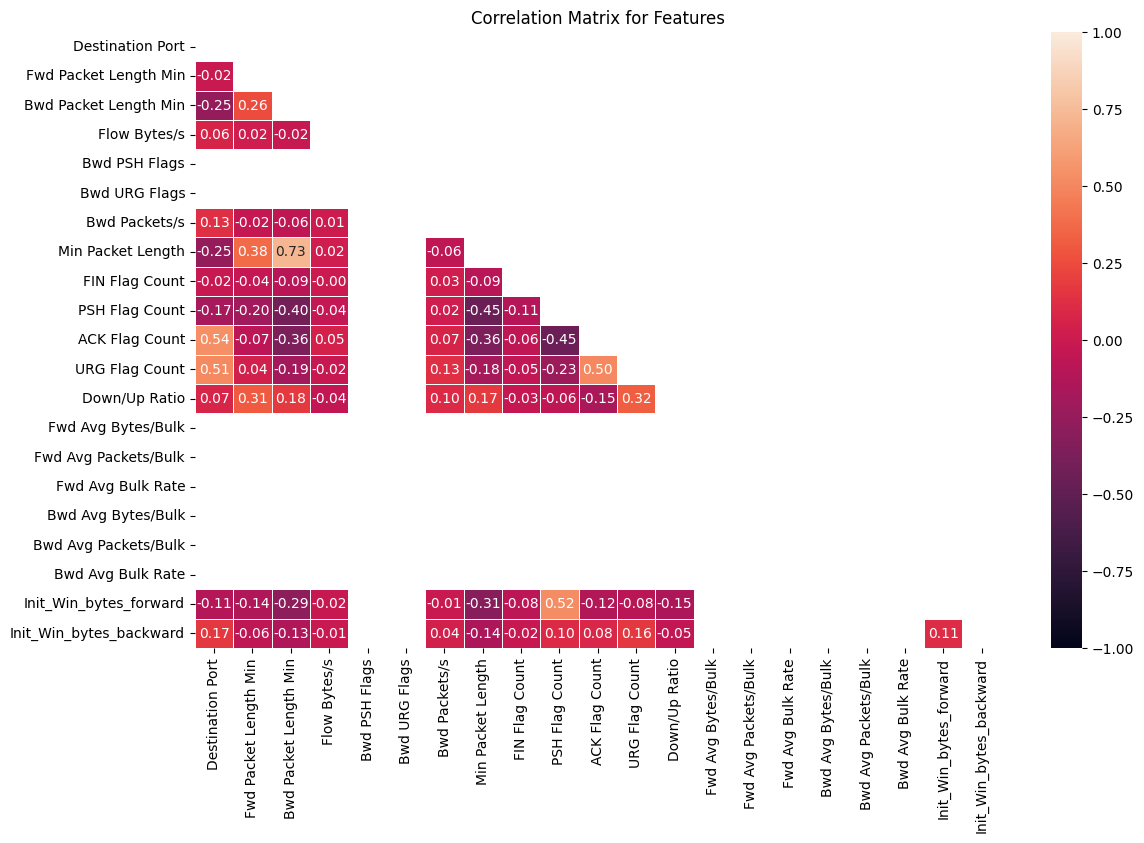

In [ ]:
plt.figure(figsize = (13, 8))
corr_matrix1 = X_scaled2.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(corr_matrix1, dtype=bool))

sns.heatmap(corr_matrix1, annot = True, mask = mask, vmin = -1, vmax = 1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Features')
plt.show()

In [ ]:
X_scaled2.shape

(251277, 21)

### Label Encoding of Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
merged_data['Label'] = lab_enc.fit_transform(merged_data['Label'])

In [ ]:
feats = X_scaled2
label = merged_data['Label'].values

### Splitting of data into training and testing sets

In [ ]:
import numpy
from sklearn.model_selection import train_test_split

feats = X_scaled2
label = merged_data['Label'].values

# Generate IDs for splitting
all_ids = numpy.arange(0, feats.shape[0])

random_seed = 1

# Then splitting the data 70:30 into training and test sets
train_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.3, train_size=0.7,
                                              random_state=random_seed, shuffle=True)

# Extract the feature data and label for the training set
train_data = feats.iloc[train_set_ids, :]
train_labels = label[train_set_ids]

# Extract the feature data and label for the testing set
test_data = feats.iloc[test_set_ids, :]
test_labels = label[test_set_ids]

train_data.shape, test_labels.shape

((175893, 21), (75384,))

### Feature importances of training sets

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, max_depth = 10)
forest.fit(train_data, train_labels)
feature_names = feats.columns
importances = forest.feature_importances_
print('feature importance:', importances)

feature importance: [5.70947530e-02 3.81886561e-03 5.02007058e-03 3.77724041e-02
 0.00000000e+00 0.00000000e+00 3.53737623e-01 2.97759956e-02
 4.61276282e-06 4.07971909e-01 2.99073471e-04 2.41634048e-03
 1.00656766e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.24948315e-02
 3.85869530e-02]


### Sorting of feature importances

In [3]:
# Convert feature importances arary to DataFrame
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features in order of importance
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

NameError: name 'pd' is not defined

### Plotting horizontal bar plot of feature importances

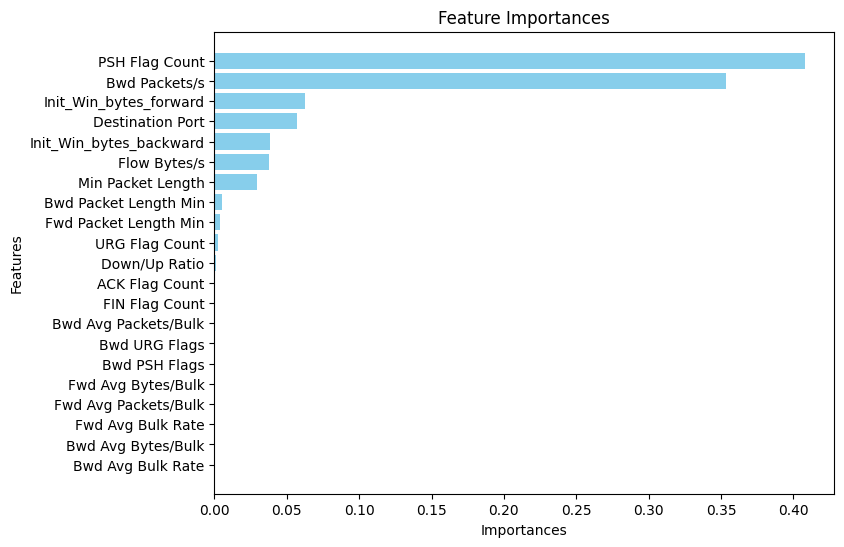

In [ ]:
import matplotlib.pyplot as plt

feature_importance = feature_importance.sort_values('importance', ascending=True)

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

### PCA for dimension reduction

In [ ]:
from sklearn.decomposition import PCA

# Reducing dimensions to 10 components
pca = PCA(n_components=10)
merged_data_pca = pca.fit_transform(X_scaled2)

# Transform pca into DataFrame of 10 dimensions
merged_data_pca_df = pd.DataFrame(data=merged_data_pca, columns=[f'PC{i+1}' for i in range(10)])
merged_data_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.656354,0.407357,0.069625,-0.267616,-0.097811,-0.343545,0.010062,0.143420,0.378717,-0.221853
1,1.786847,0.205950,-0.013894,0.002700,-0.028225,-0.239581,0.184643,0.337759,0.121639,0.013272
2,2.341815,0.343219,0.053673,-0.199320,-0.086107,-0.226751,-0.005145,0.118177,0.215375,-0.111739
3,-0.700773,0.461455,-1.589482,-0.353896,-0.298374,0.190028,0.383688,-0.556352,-0.415059,0.882087
4,-0.529991,-1.469167,0.657939,0.207449,0.064370,0.557679,0.049590,0.536566,-0.655648,0.032474


### Explained variance and cumulative explained variance ratio of PCA

In [ ]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

print('Explaned Variance:\n', explained_variance)
print('\n')
print('Explaned Variance Ratio:\n', explained_variance_ratio)
print('\n')
print('Cumulative Explaned Variance Ratio:\n', cumulative_explained_variance_ratio)

Explaned Variance:
 [2.78099072 2.38977326 1.34296398 1.07376759 1.00227576 0.94385754
 0.92250603 0.73170426 0.59807011 0.50361357]


Explaned Variance Ratio:
 [0.21392151 0.18382798 0.10330451 0.08259718 0.07709783 0.07260414
 0.07096172 0.05628472 0.04600521 0.03873935]


Cumulative Explaned Variance Ratio:
 [0.21392151 0.39774949 0.501054   0.58365118 0.66074901 0.73335315
 0.80431487 0.86059959 0.9066048  0.94534415]


### Plot of explaine variance ratio and cumulative explained variance ratio

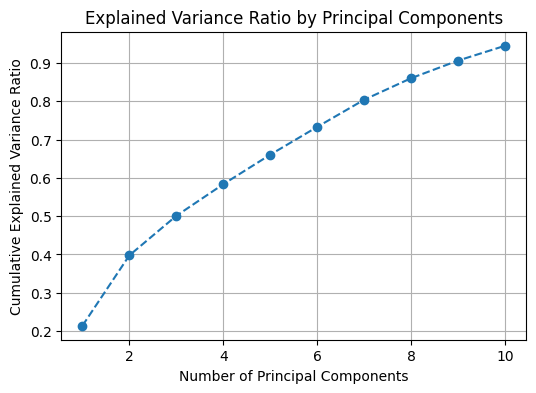

In [ ]:
import matplotlib.pyplot as plt

# Plot explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid()
plt.show()

### Splitting of data into training and testing sets

In [ ]:
import numpy
from sklearn.model_selection import train_test_split

# Assume feats and label are predefined as per the snippet
feats = merged_data_pca_df
label = merged_data['Label'].values

# Generate IDs for splitting
all_ids = numpy.arange(0, feats.shape[0])

random_seed = 1

# Then splitting the data 70:30 into training and test sets
train_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.3, train_size=0.7,
                                              random_state=random_seed, shuffle=True)

# Training set
X_train = feats.iloc[train_set_ids, :]
y_train = label[train_set_ids]

# Testing set
X_test = feats.iloc[test_set_ids, :]
y_test = label[test_set_ids]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((175893, 10), (175893,), (75384, 10), (75384,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)

### Model training for Support Vector Classifier

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     60789
           1       0.00      0.00      0.00        97
           2       0.70      0.54      0.61      5419
           3       0.00      0.00      0.00       148
           4       0.55      0.93      0.69      3133
           5       1.00      0.06      0.11        70
           6       0.00      0.00      0.00        81
           7       0.00      0.00      0.00       163
           8       0.00      0.00      0.00         1
          10       0.82      0.99      0.90      5256
          11       0.00      0.00      0.00       119
          12       0.00      0.00      0.00        73
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        34

    accuracy                           0.90     75384
   macro avg       0.29      0.25      0.23     75384
weighted avg       0.90      0.90      0.90     75384

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


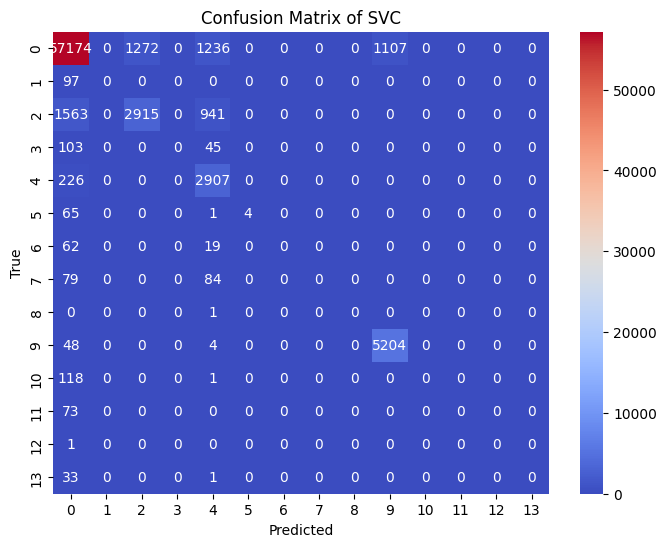

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Support Vector Classifier (SVC) model
svc = SVC()

# Fit the SVC model on the training data (X_train: features, y_train: labels)
svm = svc.fit(X_train, y_train)

# Use the trained SVC model to predict labels for the test data (X_test: test features)
y_pred_svc = svm.predict(X_test)

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of SVC')
plt.show()

SVC Classification Report:
              precision    recall  f1-score   support

           0     0.9586    0.9405    0.9495     60789
           1     0.0000    0.0000    0.0000        97
           2     0.6962    0.5379    0.6069      5419
           3     0.0000    0.0000    0.0000       148
           4     0.5548    0.9279    0.6944      3133
           5     1.0000    0.0571    0.1081        70
           6     0.0000    0.0000    0.0000        81
           7     0.0000    0.0000    0.0000       163
           8     0.0000    0.0000    0.0000         1
          10     0.8246    0.9901    0.8998      5256
          11     0.0000    0.0000    0.0000       119
          12     0.0000    0.0000    0.0000        73
          13     0.0000    0.0000    0.0000         1
          14     0.0000    0.0000    0.0000        34

    accuracy                         0.9048     75384
   macro avg     0.2882    0.2467    0.2328     75384
weighted avg     0.9045    0.9048    0.9010     75384

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


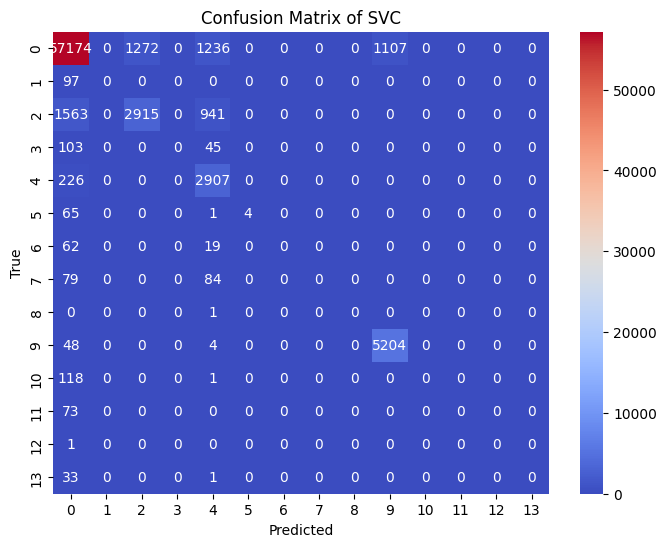

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc = SVC()
svm = svc.fit(X_train, y_train)
y_pred_svc = svm.predict(X_test)

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc, digits = 4))

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of SVC')
plt.show()

In [ ]:
import numpy as np

# Original labels
y_labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14])

# Identify unexpected labels
expected_labels = np.arange(0, 13)
unexpected_labels = np.setdiff1d(y_labels, expected_labels)

print(f"Unique labels in y_labels: {np.unique(y_labels)}")
print(f"Unexpected classes found: {unexpected_labels}")

# Remove instances with unexpected labels
mask = ~np.isin(y_labels, unexpected_labels)
adjusted_y_labels = y_labels[mask]

print(f"Adjusted unique labels in y_labels: {np.unique(adjusted_y_labels)}")

# Fit the model again
try:
    xgb.fit(X_data[mask], adjusted_y_labels)
    # Predict using the model
except ValueError as e:
    print(e)


Unique labels in y_labels: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14]
Unexpected classes found: [13 14]
Adjusted unique labels in y_labels: [ 0  1  2  3  4  5  6  7  9 10 11 12]
Item wrong length 14 instead of 75384.


### Model training of XGBClassifier

Unique labels in y_labels: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14]
Unexpected classes found: [14]
Adjusted unique labels in y_labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


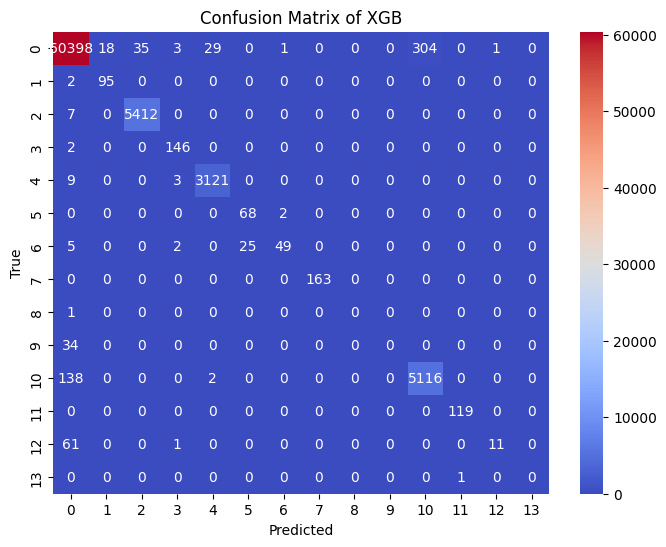

In [ ]:
import numpy as np
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Check unique values in y_labels
unique_labels = np.unique(y_labels)
print("Unique labels in y_labels:", unique_labels)

# Define the expected classes
expected_classes = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

# Find any unexpected classes
unexpected_classes = np.setdiff1d(unique_labels, expected_classes)
if len(unexpected_classes) > 0:
    print("Unexpected classes found:", unexpected_classes)
    # Handle unexpected classes (e.g., remove or map them)
    # Here we map the unexpected class 14 to a valid class, e.g., 9 (you can choose the appropriate mapping)
    y_labels = np.where(y_labels == 14, 9, y_labels)

# Re-check unique values in y_labels after adjustment
unique_labels_adjusted = np.unique(y_labels)
print("Adjusted unique labels in y_labels:", unique_labels_adjusted)

# Fit the model again
xgb.fit(X_data, y_labels)

# Predict using the model
y_pred_xgb = xgb.predict(X_data)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_labels, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGB')
plt.show()

SVC Classification Report:
              precision    recall  f1-score   support

           0     0.9929    0.9897    0.9913     60789
           1     0.8431    0.4433    0.5811        97
           2     0.9939    0.9946    0.9943      5419
           3     0.9843    0.8446    0.9091       148
           4     0.9889    0.9978    0.9933      3133
           5     0.5690    0.9429    0.7097        70
           6     0.9333    0.5185    0.6667        81
           7     1.0000    0.9693    0.9844       163
           8     0.0000    0.0000    0.0000         1
          10     0.9018    0.9572    0.9287      5256
          11     0.9407    0.9328    0.9367       119
          12     0.6923    0.1233    0.2093        73
          13     0.0000    0.0000    0.0000         1
          14     1.0000    0.0294    0.0571        34

    accuracy                         0.9852     75384
   macro avg     0.7743    0.6245    0.6401     75384
weighted avg     0.9854    0.9852    0.9846     75384

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


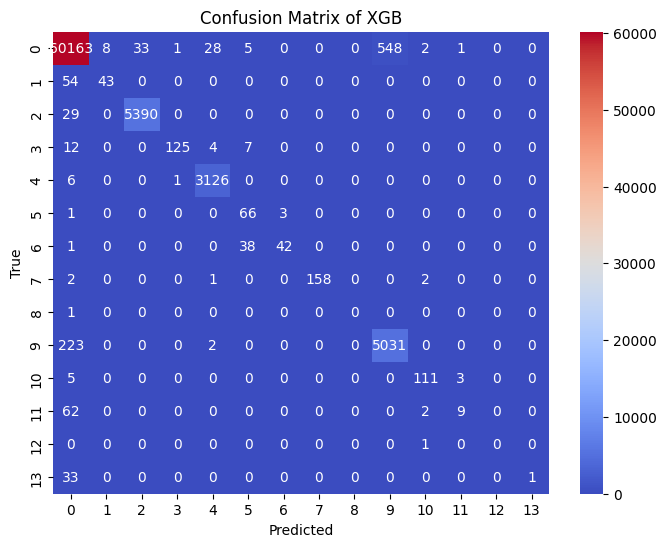

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
xgb = XGBClassifier()

# Fit the model again
xgb.fit(X_train, y_train1)

# Predict using the model
y_pred_xgb = xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred_xgb)

print("SVC Classification Report:")
print(classification_report(y_test, y_pred, digits = 4))

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGB')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_estimators= 100,
    max_depth = 10)

param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
cv = StratifiedKFold(n_splits=2)

grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=cv, scoring='accuracy')
grid_search_rfc.fit(X_train, y_train)
y_pred_rfc = grid_search_rfc.predict(X_test)

print("RFC Classification Report:")
print(classification_report(y_train, y_pred_rfc, digits = 4))

RFC Classification Report:


ValueError: Found input variables with inconsistent numbers of samples: [175893, 75384]

### Model training of RandomForestClassifier

RFC Classification Report:
              precision    recall  f1-score   support

           0     0.9922    0.9891    0.9907     60789
           1     1.0000    0.3402    0.5077        97
           2     0.9926    0.9965    0.9946      5419
           3     0.9456    0.9392    0.9424       148
           4     0.9905    0.9933    0.9919      3133
           5     0.7253    0.9429    0.8199        70
           6     0.9643    0.6667    0.7883        81
           7     1.0000    0.9632    0.9812       163
           8     0.0000    0.0000    0.0000         1
          10     0.8941    0.9524    0.9223      5256
          11     0.9417    0.9496    0.9456       119
          12     1.0000    0.0274    0.0533        73
          13     0.0000    0.0000    0.0000         1
          14     0.0000    0.0000    0.0000        34

    accuracy                         0.9844     75384
   macro avg     0.7462    0.6257    0.6384     75384
weighted avg     0.9845    0.9844    0.9837     75384

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


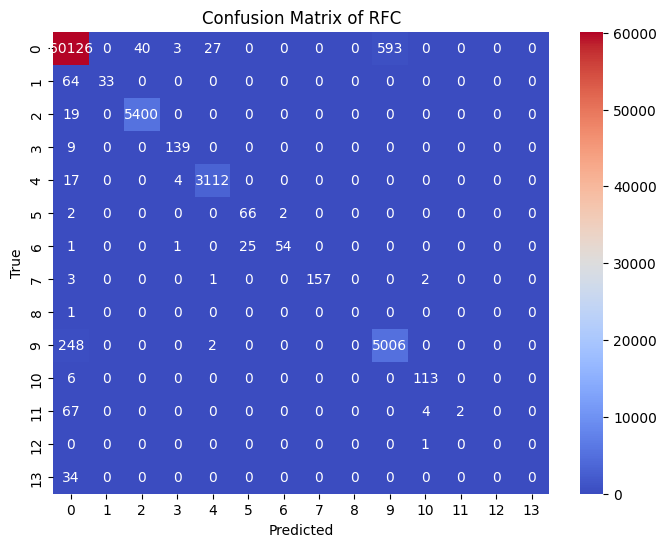

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier(n_estimators= 100,
    max_depth = 10)

model_rfc = rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

print("RFC Classification Report:")
print(classification_report(y_test, y_pred_rfc, digits = 4))

conf_matrix = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of RFC')
plt.show()

### Model training for DecisionTreeClassifier

DT Classification Report:
              precision    recall  f1-score   support

           0     0.9899    0.9908    0.9903     60789
           1     0.7531    0.6289    0.6854        97
           2     0.9930    0.9941    0.9935      5419
           3     0.9722    0.9459    0.9589       148
           4     0.9864    0.9974    0.9919      3133
           5     0.7010    0.9714    0.8144        70
           6     0.9636    0.6543    0.7794        81
           7     1.0000    0.9693    0.9844       163
           8     0.0000    0.0000    0.0000         1
          10     0.9145    0.9176    0.9160      5256
          11     0.9328    0.9328    0.9328       119
          12     0.5882    0.1370    0.2222        73
          13     0.0000    0.0000    0.0000         1
          14     1.0000    0.0294    0.0571        34

    accuracy                         0.9838     75384
   macro avg     0.7711    0.6549    0.6662     75384
weighted avg     0.9836    0.9838    0.9833     75384


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


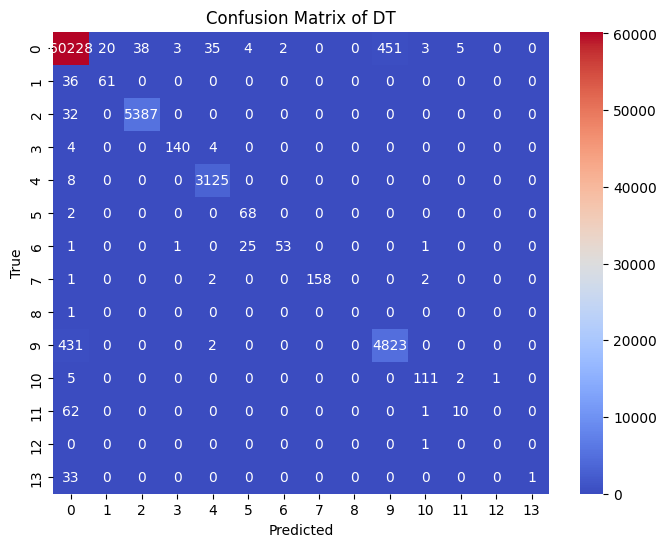

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Instantiate Deep Learning
model_dt = DecisionTreeClassifier()

# Train the model
model_dt.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = model_dt.predict(X_test)

# Print classification report
print("DT Classification Report:")
print(classification_report(y_test, y_pred_dt, digits = 4))

conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of DT')
plt.show()


### Plot of Comparison metrics of models

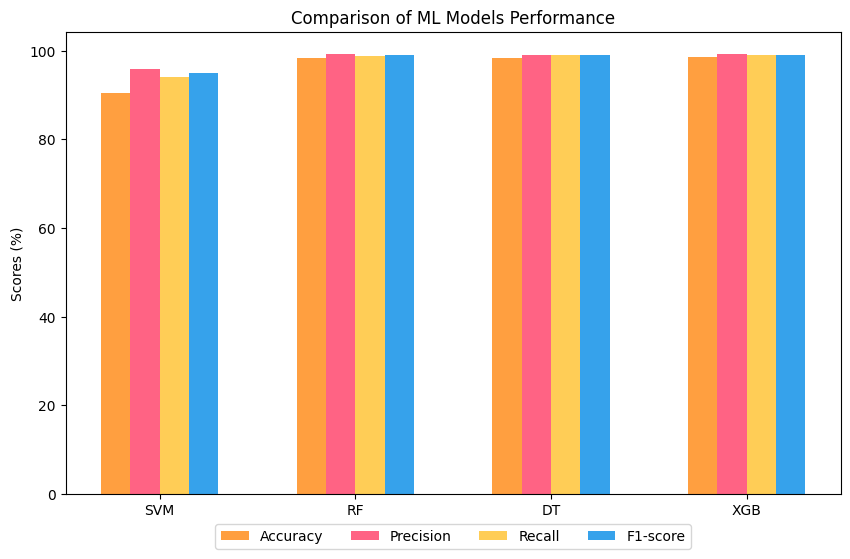

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = ['SVM', 'RF', 'DT', 'XGB']
accuracy = [90.48, 98.44, 98.38, 98.52]
precision = [95.86, 99.22, 98.99, 99.29]
recall = [94.05, 98.91, 99.08, 98.97]
f1_score = [94.95, 99.07, 99.03, 99.13]

plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(models))

custom_colors = ['#FF9F40', '#FF6384', '#FFCD56', '#FF6384']

plt.bar(index, accuracy, bar_width, label='Accuracy', color = '#FF9F40')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color = '#FF6384')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color = '#FFCD56')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-score', color = '#36A2EB')

# Adding labels, title and legend
plt.ylabel('Scores (%)')
plt.title('Comparison of ML Models Performance')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Displaying the bar chart
plt.show()

In [ ]:
from joblib import Parallel, delayed
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are defined elsewhere in your code

# Assuming you have more than 3 classes, adjust the classes as needed
unique_classes = np.unique(y_train)
y_test_binary = label_binarize(y_test, classes=unique_classes)

# Define classifiers
classifiers = {
    "RF": RandomForestClassifier(max_features=0.2),
    "SVM": OneVsRestClassifier(SVC(probability=True)),
    "DT": DecisionTreeClassifier(),
    "XGB": XGBClassifier()
}

# Function to train and compute ROC curve and AUC for each classifier
def process_classifier(name, clf):
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(y_test_binary.shape[1]):
        if len(np.unique(y_test_binary[:, i])) == 2:
            fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], probs[:, i])
            roc_auc[i] = roc_auc_score(y_test_binary[:, i], probs[:, i])
        else:
            fpr[i], tpr[i], roc_auc[i] = None, None, None

    roc_auc["micro"] = roc_auc_score(y_test_binary, probs, multi_class="ovr", average="micro")
    return name, fpr, tpr, roc_auc

# Parallel processing for classifiers
results = Parallel(n_jobs=-1)(delayed(process_classifier)(name, clf) for name, clf in classifiers.items())

# Collect results
fpr = {name: res[1] for name, res in results}
tpr = {name: res[2] for name, res in results}
roc_auc = {name: res[3] for name, res in results}

# Plot ROC curves
plt.figure(figsize=(10, 6))
colors = {"RF": "blue", "SVM": "green", "DT": "red", "XGB": "purple"}
for name in classifiers.keys():
    if fpr[name][1] is not None and tpr[name][1] is not None:
        plt.plot(fpr[name][1], tpr[name][1], label=f'{name} (AUC = {roc_auc[name]["micro"]:.2f})', color=colors[name])
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM, RF, DT, and XGB')
plt.legend()
plt.show()


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming you have the datasets X_train, X_test, y_train, y_test defined

# Convert y_test to binary format using one-hot encoding
# Adjust classes list according to your actual classes
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

# Define and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(max_features=0.2)
rf_classifier.fit(X_train, y_train)

# Compute ROC curve and AUC for RF
rf_probs = rf_classifier.predict_proba(X_test)
rf_fpr, rf_tpr, _ = roc_curve(y_test_binary.ravel(), rf_probs.ravel())
rf_auc = roc_auc_score(y_test_binary, rf_probs, average='micro')

# Define and train the SVM classifier
svm_classifier = OneVsRestClassifier(SVC(probability=True))
svm_classifier.fit(X_train, y_train)

# Compute ROC curve and AUC for SVM
svm_probs = svm_classifier.predict_proba(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test_binary.ravel(), svm_probs.ravel())
svm_auc = roc_auc_score(y_test_binary, svm_probs, average='micro')

# Define and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Compute ROC curve and AUC for Decision Tree
dt_probs = dt_classifier.predict_proba(X_test)
dt_fpr, dt_tpr, _ = roc_curve(y_test_binary.ravel(), dt_probs.ravel())
dt_auc = roc_auc_score(y_test_binary, dt_probs, average='micro')

# Define and train the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Compute ROC curve and AUC for XGBoost
xgb_probs = xgb_classifier.predict_proba(X_test)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_binary.ravel(), xgb_probs.ravel())
xgb_auc = roc_auc_score(y_test_binary, xgb_probs, average='micro')

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'RF (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'DT (AUC = {dt_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGB (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM vs RF vs DT vs XGB')
plt.legend()
plt.show()


### Confusion matrices of models

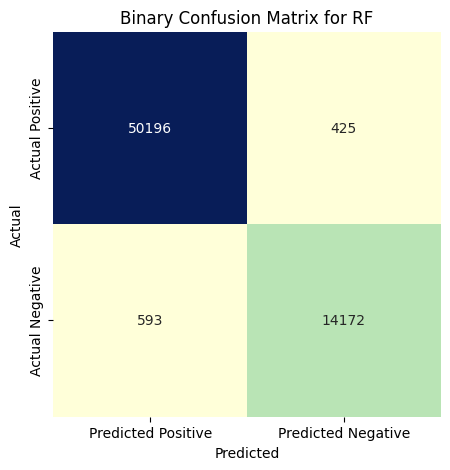

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Original confusion matrix
original_cm = np.array([
    [50196, 6, 30, 2, 22, 0, 0, 0, 0, 533, 0, 0, 0, 0],
    [41, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [14, 0, 5405, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [9, 0, 0, 139, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [14, 0, 4, 0, 3115, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 0, 68, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 25, 54, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 162, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [34, 0, 0, 0, 0, 0, 0, 0, 0, 5017, 0, 0, 0, 0],
    [237, 0, 0, 2, 0, 0, 0, 0, 0, 0, 115, 0, 0, 0],
    [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
    [67, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
])

# Define the positive class
positive_class = 0

# Calculate TP, FP, FN, TN
TP = original_cm[positive_class, positive_class]
FP = original_cm[:, positive_class].sum() - TP
FN = original_cm[positive_class, :].sum() - TP
TN = original_cm.sum() - (TP + FP + FN)

# Create the 2x2 confusion matrix
binary_cm = np.array([[TP, FP],
                      [FN, TN]])

# Display the 2x2 confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(binary_cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Binary Confusion Matrix for RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


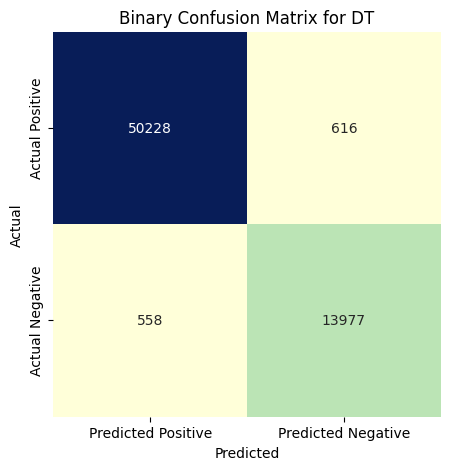

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Original confusion matrix (Decision Tree)
original_cm_dt = np.array([
    [50228, 20, 38, 35, 4, 2, 451, 3, 5, 0, 0, 0, 0, 0],
    [36, 61, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [32, 0, 5387, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [4, 0, 140, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [8, 0, 0, 0, 3125, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 0, 68, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 25, 53, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 158, 0, 2, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [431, 0, 0, 0, 2, 0, 0, 0, 0, 4823, 0, 0, 0, 0],
    [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 111, 2, 1, 0],
    [62, 0, 0, 0, 0, 0, 0, 0, 0, 1, 10, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])

# Define the positive class
positive_class = 0

# Calculate TP, FP, FN, TN
TP = original_cm_dt[positive_class, positive_class]
FP = original_cm_dt[:, positive_class].sum() - TP
FN = original_cm_dt[positive_class, :].sum() - TP
TN = original_cm_dt.sum() - (TP + FP + FN)

# Create the 2x2 confusion matrix
binary_cm_dt = np.array([[TP, FP],
                         [FN, TN]])

# Display the 2x2 confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(binary_cm_dt, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Binary Confusion Matrix for DT')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


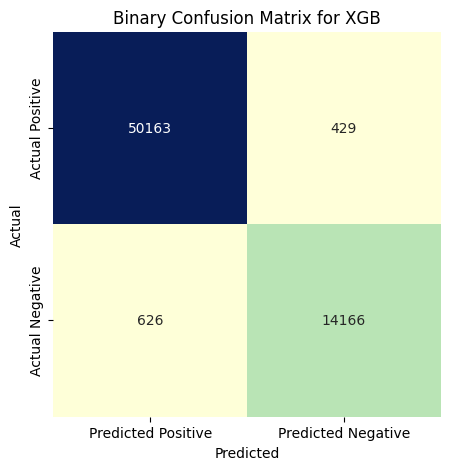

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix from the provided image
original_cm_xgb = np.array([
    [50163, 8, 33, 1, 28, 5, 0, 0, 548, 2, 1, 0, 0],
    [54, 43, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [29, 0, 5390, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [12, 0, 125, 4, 7, 0, 0, 0, 0, 0, 0, 0, 0],
    [6, 0, 0, 1, 3126, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 66, 3, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 38, 42, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 1, 0, 158, 0, 2, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [223, 0, 0, 0, 2, 0, 0, 0, 5031, 0, 0, 0, 0],
    [5, 0, 0, 0, 0, 0, 0, 0, 0, 111, 3, 0, 0],
    [62, 0, 0, 0, 0, 0, 0, 0, 0, 2, 9, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])

# Define the positive class
positive_class_xgb = 0

# Calculate TP, FP, FN, TN
TP_xgb = original_cm_xgb[positive_class_xgb, positive_class_xgb]
FP_xgb = original_cm_xgb[:, positive_class_xgb].sum() - TP_xgb
FN_xgb = original_cm_xgb[positive_class_xgb, :].sum() - TP_xgb
TN_xgb = original_cm_xgb.sum() - (TP_xgb + FP_xgb + FN_xgb)

# Create the 2x2 confusion matrix
binary_cm_xgb = np.array([[TP_xgb, FP_xgb],
                          [FN_xgb, TN_xgb]])

# Display the 2x2 confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(binary_cm_xgb, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Binary Confusion Matrix for XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


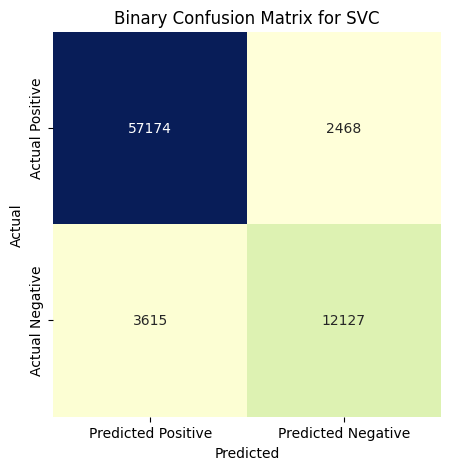

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Original confusion matrix for SVC
original_cm_svc = np.array([
    [57174, 0, 1272, 0, 1236, 0, 0, 0, 0, 1107, 0, 0, 0, 0],
    [97, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1563, 0, 2915, 0, 941, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [103, 0, 0, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [226, 0, 0, 0, 2907, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [65, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [62, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [79, 0, 0, 0, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [48, 0, 0, 4, 0, 0, 0, 0, 0, 5204, 0, 0, 0, 0],
    [118, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Define the positive class
positive_class_svc = 0

# Calculate TP, FP, FN, TN
TP_svc = original_cm_svc[positive_class_svc, positive_class_svc]
FP_svc = original_cm_svc[:, positive_class_svc].sum() - TP_svc
FN_svc = original_cm_svc[positive_class_svc, :].sum() - TP_svc
TN_svc = original_cm_svc.sum() - (TP_svc + FP_svc + FN_svc)

# Create the 2x2 confusion matrix
binary_cm_svc = np.array([[TP_svc, FP_svc],
                          [FN_svc, TN_svc]])

# Display the 2x2 confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(binary_cm_svc, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Binary Confusion Matrix for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### ROC-AUC curve of models

In [ ]:
def calculate_tpr_fpr(tp, fp, tn, fn):
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

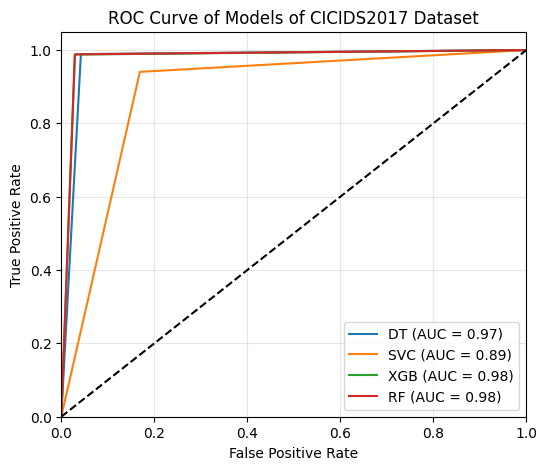

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Define function to calculate TPR and FPR
def calculate_tpr_fpr(tp, fp, tn, fn):
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

# Confusion matrix data
confusion_matrices = {
    "DT": {"TP": 50228, "FP": 616, "TN": 13977, "FN": 558},
    "SVC": {"TP": 57174, "FP": 2468, "TN": 12127, "FN": 3615},
    "XGB": {"TP": 50163, "FP": 429, "TN": 14166, "FN": 626},
    "RF": {"TP": 50196, "FP": 425, "TN": 14172, "FN": 593}
}

# Calculate TPR and FPR for each model
tpr_fpr = {}
for model, cm in confusion_matrices.items():
    tpr, fpr = calculate_tpr_fpr(cm["TP"], cm["FP"], cm["TN"], cm["FN"])
    tpr_fpr[model] = {"TPR": tpr, "FPR": fpr}

# Plot ROC curves
plt.figure(figsize=(6, 5))
for model, values in tpr_fpr.items():
    fpr = np.array([0, values["FPR"], 1])
    tpr = np.array([0, values["TPR"], 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Models of CICIDS2017 Dataset')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
